In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from hcga.io import save_dataset
from hcga.graph import Graph, GraphCollection
from math import log

if not Path("datasets").exists():
    os.mkdir("datasets")
if not Path("results").exists():
    os.mkdir("results")


# Different values of p for G_Np random graph

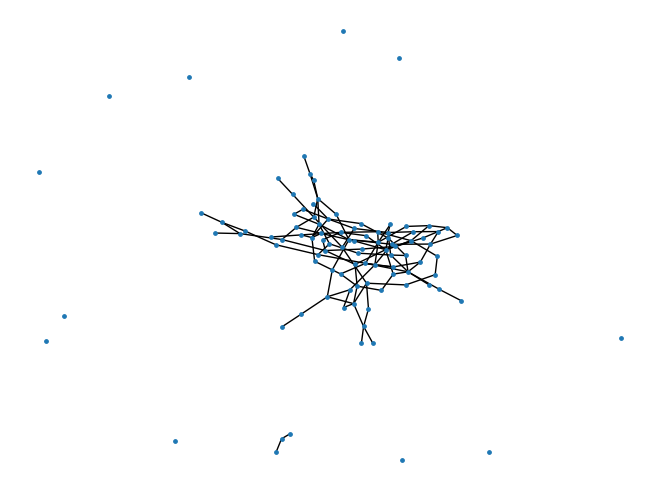

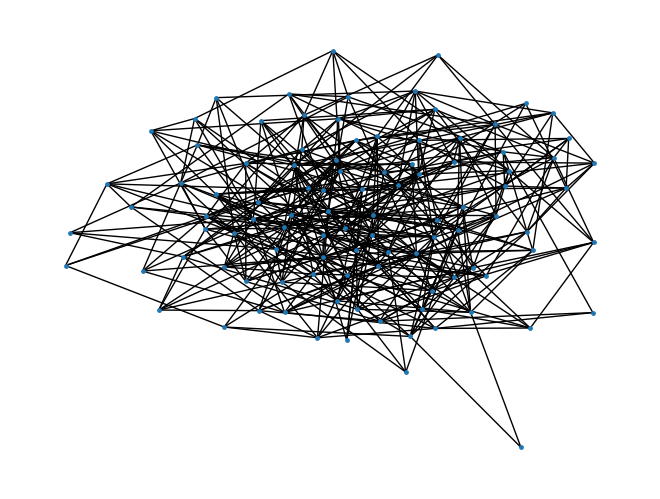

In [5]:
%matplotlib inline
N=100

# For p lower than log(N)/N
pl = log(N)/(2*N)
G_GNP = nx.gnp_random_graph(N,pl)
plt.figure(1)
nx.draw(G_GNP,node_size=6)

# For p greater than log(N)/N
pg = 2 * log(N)/N
G_GNP = nx.gnp_random_graph(N,pg)
plt.figure(2)
nx.draw(G_GNP,node_size=6)

# Generate labelled random graphs

In [3]:
# defining number of nodes
n = 100

# number of graphs
num_g = 50

# number of node features
n_nf = 3

# empty list of graphs and labels
graphs = []
labels = []
node_features = []

# setting probability of edge existing for random graphs
p = 0.6

# setting number of edges to add per node
m = 4

In [4]:
# adding 50 random graphs (label 0)
for i in range(num_g):
    
    g = nx.fast_gnp_random_graph(n, p)
    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)

    labels.append(0)

In [5]:
# adding 50 powerlaw cluster graphs (label 1)
for i in range(num_g):
    
    g = nx.powerlaw_cluster_graph(n, m, p)
    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)

    labels.append(1)

In [6]:
# adding 50 watts strogatz graphs (label 2)
for i in range(num_g):
    
    g = nx.watts_strogatz_graph(n, m, p)
    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)

    labels.append(2)

In [7]:
# create graph collection object
g_c = GraphCollection()

# add graphs, node features and labels to the object
g_c.add_graph_list(graphs, node_features, labels)

In [8]:
# perform some sanity checks

print("There are {} graphs".format(len(g_c.graphs)))
print("There are {} features per node".format(g_c.get_n_node_features()))

There are 150 graphs
There are 3 features per node


In [9]:
# we can save this if we want to and run everything from the command line

save_dataset(
    g_c,
    "labelled_graph_dataset",
    folder="./datasets/labelled_graph",
)

## Extracting features and generate feature matrix

In [10]:
# import hcga object
from hcga.hcga import Hcga

# define an object
h = Hcga()

In [12]:
# load previously saved dataset
h.load_data(
    "./datasets/labelled_graph/labelled_graph_dataset.pkl"
)

In [13]:
# extracting all features here
h.extract(mode="fast", n_workers=4, timeout=5)

# saving all features into a pickle
h.save_features("./results/labelled_graph/features.pkl")

INFO:hcga.extraction:Setting up feature classes...
100%|██████████| 43/43 [00:04<00:00,  9.19it/s]
INFO:hcga.extraction:Extracting features from 150 graphs (we disabled 0 graphs).
INFO:hcga.extraction:Computing features for 150 graphs:
100%|██████████| 150/150 [14:30<00:00,  5.80s/it]
INFO:hcga.extraction:1264 feature extracted.


## Classification and analysis

In [14]:
# load the saved features

h.load_features("./results/labelled_graph/features.pkl")

In [15]:
# implement a classification analyse of the features

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
h.analyse_features(
    compute_shap=False,
    model = model,    
    feature_file="./results/labelled_graph/features.pkl",
    results_folder="./results/labelled_graph",
    save_model = True, # save the trained model
    plot=False,
)

INFO:hcga.analysis:1264 total features
INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:957 valid features
INFO:hcga.analysis:957 with interpretability 1
INFO:hcga.analysis:Counts of graphs/label: 
label
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64
INFO:hcga.analysis:Using 10 splits
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Accuracy: 1.0 +/- 0.0
INFO:hcga.analysis:Fitting model to all data


In [14]:
accuracy_matrix, top_features = h.pairwise_classification(
    feature_file="./results/labelled_graph/features.pkl"
)

INFO:hcga.analysis:1264 total features
INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:957 valid features
INFO:hcga.analysis:957 with interpretability 1
INFO:hcga.analysis:... Using Xgboost classifier ...
  0%|          | 0/3 [00:00<?, ?it/s]INFO:hcga.analysis:Pairwise classification between classes 0.0 and 1.0
INFO:hcga.analysis:Counts of graphs/label: 
label
0    50
1    50
Name: count, dtype: int64
INFO:hcga.analysis:Using 10 splits
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 0.9 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Accuracy: 0.99 +/- 0.03
 3

In [15]:
# find top features pairwisely
print(top_features[(0.0, 1.0)])
print(top_features[(0.0, 2.0)])
print(top_features[(1.0, 2.0)])

['CM_communities_weighted_coverage_N', 'CM_communities_weighted_coverage_E', 'CM_communities_weighted_performance_N', 'CM_communities_performance_N', 'Cns_connectance']
['CM_communities_weighted_coverage_N', 'CM_communities_weighted_coverage_E', 'CM_communities_weighted_performance_N', 'CM_communities_performance_N', 'Cns_connectance']
['CM_communities_weighted_coverage_N', 'CM_communities_weighted_coverage_E', 'CM_communities_weighted_performance_N', 'CM_communities_performance_N', 'Cns_connectance']


## Line Plot of Top Features

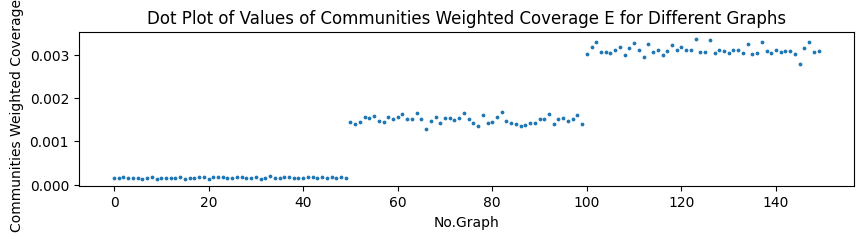

In [16]:
# Vectors of top features
CWCE = h.features[('CM', 'communities_weighted_coverage_E')]
CT = h.features[('Cns', 'connectance')]

# Create an index list
graph_no = list(range(len(CWCE)))

# Create a dot plot
%matplotlib inline
plt.figure(figsize=(10, 2))
plt.scatter(graph_no, CWCE, s=3)

plt.xlabel('No.Graph')
plt.ylabel('Communities Weighted Coverage E')
plt.title('Dot Plot of Values of Communities Weighted Coverage E for Different Graphs')

plt.show()


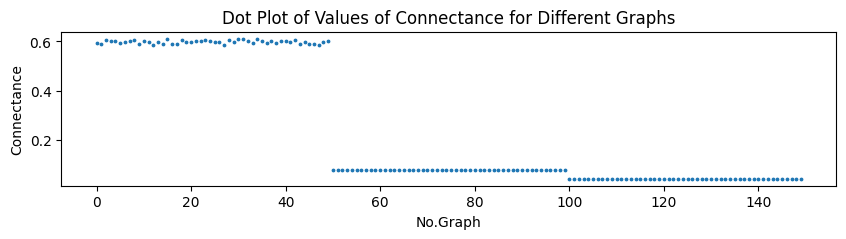

In [17]:
# Create an index list
graph_no = list(range(len(CT)))

# Create a dot plot
%matplotlib inline
plt.figure(figsize=(10, 2))
plt.scatter(graph_no, CT, s=3)

plt.xlabel('No.Graph')
plt.ylabel('Connectance')
plt.title('Dot Plot of Values of Connectance for Different Graphs')

plt.show()

# Classifying unlabelled random graphs
Here we need to restart the kernel each time when randomly generating graphs to ensure the extract feature step run successfully.

## Generate unlabelled random graphs with same parameters

In [2]:
# defining limits on number of nodes
n = 100

# number of graphs
num_g = 50

# number of node features
n_nf = 3


# empty list of graphs and labels
graphs = []
node_features = []


# setting limits on probability of edge existing for random graphs
p = 0.6

# adding 50 Gnp graphs
for i in range(num_g):

    g = nx.fast_gnp_random_graph(n, p)
    g.label = 0

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)

    node_features.append(node_feat_matrix)


# setting limits on number of edges to add per node
m = 4

# adding 50 powerlaw cluster graphs
for i in range(num_g):

    g = nx.powerlaw_cluster_graph(n, m, p)
    g.label = 1

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)


# adding 50 watts strogatz graphs
for i in range(num_g):

    g = nx.watts_strogatz_graph(n, m, p)
    g.label = 2

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)

In [3]:
# create graph collection object
graphs_unlabelled = GraphCollection()
graphs_unlabelled.add_graph_list(graphs, node_features)  # loaded without the labels

# save the unlabelled dataset
save_dataset(
    graphs_unlabelled, "unlabelled_graph_dataset", folder="./datasets/unlabelled_graph"
)

# perform some sanity checks
print(
    "There are {} graphs in the unlabelled dataset".format(
        len(graphs_unlabelled.graphs)
    )
)
print("There are {} features per node".format(graphs_unlabelled.get_n_node_features()))

There are 150 graphs in the unlabelled dataset
There are 3 features per node


### Extracting features and generate feature matrix

In [4]:
# import hcga object
from hcga.hcga import Hcga

# define an object
h = Hcga()

In [5]:
# extract features for the secondary dataset with no labels
h.load_data(
    "./datasets/unlabelled_graph/unlabelled_graph_dataset.pkl"
)

In [6]:
# extracting all features here
h.extract(mode="fast", n_workers=4, timeout=5)

# saving all features into a pickle
h.save_features("./results/unlabelled_graph/features.pkl")

INFO:hcga.extraction:Setting up feature classes...
100%|██████████| 43/43 [00:04<00:00, 10.08it/s]
INFO:hcga.extraction:Extracting features from 150 graphs (we disabled 0 graphs).
INFO:hcga.extraction:Computing features for 150 graphs:
100%|██████████| 150/150 [13:47<00:00,  5.51s/it]
INFO:hcga.extraction:1264 feature extracted.


## kNN trained model

### With graph generated above

In [7]:
h.analyse_features(
    plot=False,
    trained_model="./results/labelled_graph/fitted_model",
    results_folder="./results/kNN_test",
)

INFO:hcga.analysis:1264 total features
INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:956 valid features
INFO:hcga.analysis:956 with interpretability 1


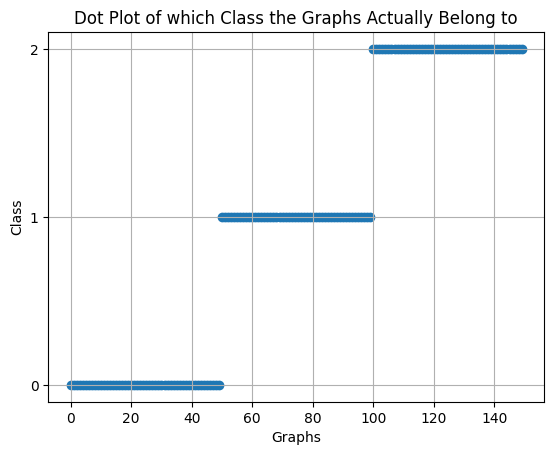

In [8]:
# visualise prediction
predictions = pd.read_csv("./results/kNN_test/prediction_results.csv", index_col=0)

# list of 150 graphs
graphs = list(range(len(predictions)))

# Create a dot plot
%matplotlib inline
plt.scatter(graphs, predictions)
plt.xlabel('Graphs')
plt.ylabel('Class')
plt.title('Dot Plot of which Class the Graphs Actually Belong to')
plt.yticks([0, 1, 2])
plt.grid(True)
plt.show()

### Taking only two types of graphs among three

In [2]:
# defining number of nodes
n = 100

# number of node features
n_nf = 3


# empty list of graphs and labels
graphs = []
node_features = []


# setting the probability
p = 0.6

# adding 50 Gnp graphs
for i in range(50):

    g = nx.fast_gnp_random_graph(n, p)
    g.label = 0

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)

    node_features.append(node_feat_matrix)


# setting limits on number of edges to add per node
m = 4

# adding 100 powerlaw cluster graphs
for i in range(100):

    g = nx.powerlaw_cluster_graph(n, m, p)
    g.label = 1

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)

    node_features.append(node_feat_matrix)

In [3]:
# create graph collection object
graphs_changed = GraphCollection()
graphs_changed.add_graph_list(graphs, node_features)  # loaded without the labels

# save the changed dataset
save_dataset(
    graphs_changed, "changed_graph_dataset0", folder="./datasets/changed_graph"
)

In [4]:
# import hcga object
from hcga.hcga import Hcga

# define an object
h = Hcga()

In [5]:
# extract features for the secondary dataset with no labels
h.load_data(
    "./datasets/changed_graph/changed_graph_dataset0.pkl"
)

In [6]:
# extracting all features here
h.extract(mode="fast", n_workers=4, timeout=5)

# saving all features into a pickle
h.save_features("./results/changed_graph/features0.pkl")

INFO:hcga.extraction:Setting up feature classes...
100%|██████████| 43/43 [00:04<00:00,  9.78it/s]
INFO:hcga.extraction:Extracting features from 150 graphs (we disabled 0 graphs).
INFO:hcga.extraction:Computing features for 150 graphs:
100%|██████████| 150/150 [14:44<00:00,  5.90s/it]
INFO:hcga.extraction:1264 feature extracted.


In [7]:
h.analyse_features(
    plot=False,
    trained_model="./results/labelled_graph/fitted_model",
    results_folder="./results/kNN_changed_test0",
)

INFO:hcga.analysis:1264 total features
INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:956 valid features
INFO:hcga.analysis:956 with interpretability 1


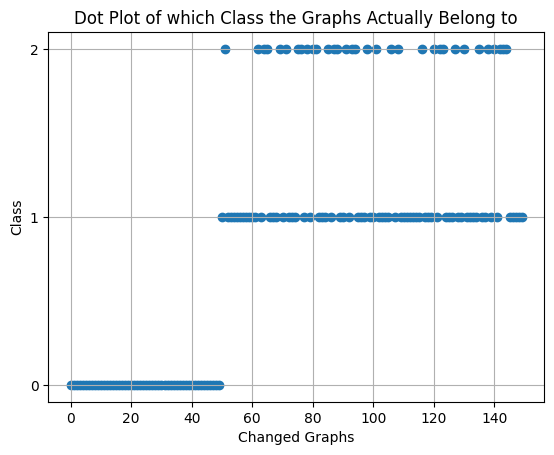

In [8]:
# visualise prediction
changed_predictions = pd.read_csv("./results/kNN_changed_test0/prediction_results.csv", index_col=0)

# list of 150 graphs
changed_graphs = list(range(len(changed_predictions)))

# Create a dot plot
%matplotlib inline
plt.scatter(changed_graphs, changed_predictions)
plt.xlabel('Changed Graphs')
plt.ylabel('Class')
plt.title('Dot Plot of which Class the Graphs Actually Belong to')
plt.yticks([0, 1, 2])
plt.grid(True)
plt.show()

### changing the proportion of different types of graphs

In [2]:
# defining number of nodes
n = 100

# number of node features
n_nf = 3


# empty list of graphs and labels
graphs = []
node_features = []


# setting the probability
p = 0.6

# adding 40 Gnp graphs
for i in range(40):

    g = nx.fast_gnp_random_graph(n, p)
    g.label = 0

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)

    node_features.append(node_feat_matrix)


# setting limits on number of edges to add per node
m = 4

# adding 45 powerlaw cluster graphs
for i in range(45):

    g = nx.powerlaw_cluster_graph(n, m, p)
    g.label = 1

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)

    node_features.append(node_feat_matrix)


# adding 65 watts strogatz graphs
for i in range(65):

    g = nx.watts_strogatz_graph(n, m, p)
    g.label = 2

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)

    node_features.append(node_feat_matrix)

In [3]:
# create graph collection object
graphs_changed = GraphCollection()
graphs_changed.add_graph_list(graphs, node_features)  # loaded without the labels

# save the changed dataset
save_dataset(
    graphs_changed, "changed_graph_dataset1", folder="./datasets/changed_graph"
)

In [4]:
# import hcga object
from hcga.hcga import Hcga

# define an object
h = Hcga()

In [5]:
# extract features for the secondary dataset with no labels
h.load_data(
    "./datasets/changed_graph/changed_graph_dataset1.pkl"
)

In [6]:
# extracting all features here
h.extract(mode="fast", n_workers=4, timeout=5)

# saving all features into a pickle
h.save_features("./results/changed_graph/features1.pkl")

INFO:hcga.extraction:Setting up feature classes...
100%|██████████| 43/43 [00:04<00:00,  9.65it/s]
INFO:hcga.extraction:Extracting features from 150 graphs (we disabled 0 graphs).
INFO:hcga.extraction:Computing features for 150 graphs:
100%|██████████| 150/150 [13:39<00:00,  5.46s/it]
INFO:hcga.extraction:1264 feature extracted.


In [7]:
h.analyse_features(
    plot=False,
    trained_model="./results/labelled_graph/fitted_model",
    results_folder="./results/kNN_changed_test1",
)

INFO:hcga.analysis:1264 total features


INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:956 valid features
INFO:hcga.analysis:956 with interpretability 1


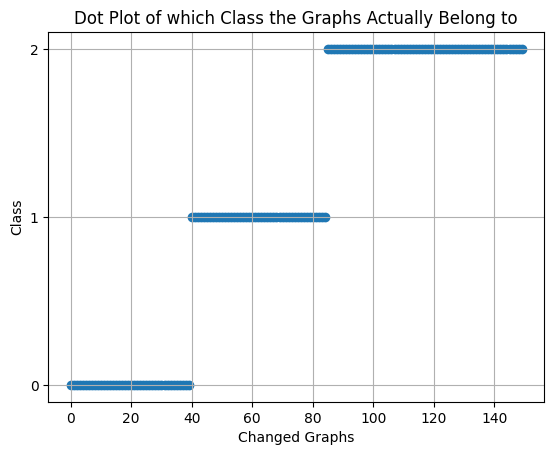

In [8]:
# visualise prediction
changed_predictions = pd.read_csv("./results/kNN_changed_test1/prediction_results.csv", index_col=0)

# list of 150 graphs
changed_graphs = list(range(len(changed_predictions)))

# Create a dot plot
%matplotlib inline
plt.scatter(changed_graphs, changed_predictions)
plt.xlabel('Changed Graphs')
plt.ylabel('Class')
plt.title('Dot Plot of which Class the Graphs Actually Belong to')
plt.yticks([0, 1, 2])
plt.grid(True)
plt.show()

### Changing the parameters within a certain range

In [2]:
# defining limits on number of nodes
n = 100

# number of node features
n_nf = 3


# empty list of graphs and labels
graphs = []
node_features = []


# changing probability from 0.6 to 0.4
p = 0.4

# adding 50 Gnp graphs
for i in range(30):

    g = nx.fast_gnp_random_graph(n, p)
    g.label = 0

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)

    node_features.append(node_feat_matrix)


# setting limits on number of edges to add per node
m = 4

# adding 50 powerlaw cluster graphs
for i in range(50):

    g = nx.powerlaw_cluster_graph(n, m, p)
    g.label = 1

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)


# adding 50 watts strogatz graphs
for i in range(70):

    g = nx.watts_strogatz_graph(n, m, p)
    g.label = 2

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)

In [3]:
# create graph collection object
graphs_changed = GraphCollection()
graphs_changed.add_graph_list(graphs, node_features)  # loaded without the labels

# save the changed dataset
save_dataset(
    graphs_changed, "changed_graph_dataset2", folder="./datasets/changed_graph"
)

In [4]:
# import hcga object
from hcga.hcga import Hcga

# define an object
h = Hcga()

In [5]:
# extract features for the secondary dataset with no labels
h.load_data(
    "./datasets/changed_graph/changed_graph_dataset2.pkl"
)

In [6]:
# extracting all features here
h.extract(mode="fast", n_workers=4, timeout=5)

# saving all features into a pickle
h.save_features("./results/changed_graph/features2.pkl")

INFO:hcga.extraction:Setting up feature classes...
100%|██████████| 43/43 [00:04<00:00,  9.62it/s]
INFO:hcga.extraction:Extracting features from 150 graphs (we disabled 0 graphs).
INFO:hcga.extraction:Computing features for 150 graphs:
100%|██████████| 150/150 [10:05<00:00,  4.04s/it]
INFO:hcga.extraction:1264 feature extracted.


In [7]:
h.analyse_features(
    plot=False,
    trained_model="./results/labelled_graph/fitted_model",
    results_folder="./results/kNN_changed_test2",
)

INFO:hcga.analysis:1264 total features
INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:956 valid features
INFO:hcga.analysis:956 with interpretability 1


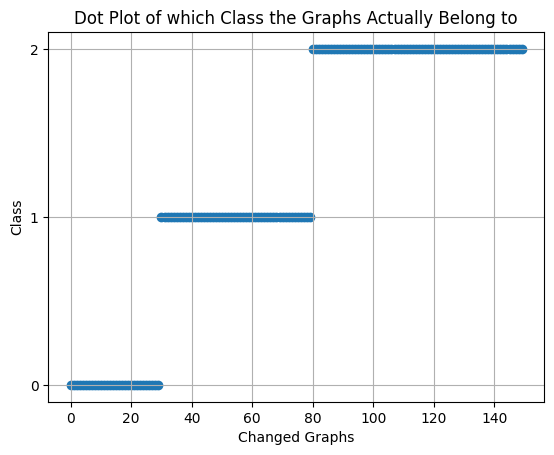

In [8]:
# visualise prediction
changed_predictions = pd.read_csv("./results/kNN_changed_test2/prediction_results.csv", index_col=0)

# list of 150 graphs
changed_graphs = list(range(len(changed_predictions)))

# Create a dot plot
%matplotlib inline
plt.scatter(changed_graphs, changed_predictions)
plt.xlabel('Changed Graphs')
plt.ylabel('Class')
plt.title('Dot Plot of which Class the Graphs Actually Belong to')
plt.yticks([0, 1, 2])
plt.grid(True)
plt.show()

### Changing the parameters greatly

In [2]:
# defining limits on number of nodes
n = 100

# number of graphs
num_g = 50

# number of node features
n_nf = 3


# empty list of graphs and labels
graphs = []
node_features = []


# setting limits on probability of edge existing for random graphs
p = 0.03

# adding 50 Gnp graphs
for i in range(num_g):

    g = nx.fast_gnp_random_graph(n, p)
    g.label = 0

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)

    node_features.append(node_feat_matrix)


# setting limits on number of edges to add per node
m = 10

# adding 50 powerlaw cluster graphs
for i in range(num_g):

    g = nx.powerlaw_cluster_graph(n, m, p)
    g.label = 1

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)


# adding 50 watts strogatz graphs
for i in range(num_g):

    g = nx.watts_strogatz_graph(n, m, p)
    g.label = 2

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)

In [3]:
# create graph collection object
graphs_changed = GraphCollection()
graphs_changed.add_graph_list(graphs, node_features)  # loaded without the labels

# save the changed dataset
save_dataset(
    graphs_changed, "changed_graph_dataset3", folder="./datasets/changed_graph"
)

In [4]:
# import hcga object
from hcga.hcga import Hcga

# define an object
h = Hcga()

In [5]:
# extract features for the secondary dataset with no labels
h.load_data(
    "./datasets/changed_graph/changed_graph_dataset3.pkl"
)

In [6]:
# extracting all features here
h.extract(mode="fast", n_workers=4, timeout=5)

# saving all features into a pickle
h.save_features("./results/changed_graph/features3.pkl")

INFO:hcga.extraction:Setting up feature classes...
100%|██████████| 43/43 [00:04<00:00,  9.15it/s]
INFO:hcga.extraction:Extracting features from 150 graphs (we disabled 0 graphs).
INFO:hcga.extraction:Computing features for 150 graphs:
100%|██████████| 150/150 [09:40<00:00,  3.87s/it]
INFO:hcga.extraction:1264 feature extracted.


In [7]:
h.analyse_features(
    plot=False,
    trained_model="./results/labelled_graph/fitted_model",
    results_folder="./results/kNN_changed_test3",
)

INFO:hcga.analysis:1264 total features
INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:956 valid features
INFO:hcga.analysis:956 with interpretability 1


ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Analyse by Hierarchical Clustering
The graphs are based on what we generated in the first step of unlabelled graphs.

In [16]:
# substitute None terms in feature matrix with 0
h_dropped = h.features.fillna(0)

# do Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit(h_dropped)

print(clustering.labels_)

[2 0 2 0 0 2 0 0 0 2 0 1 2 2 0 0 2 0 0 0 0 0 0 2 2 2 0 2 1 2 0 0 0 0 0 0 0
 0 0 0 2 0 2 2 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


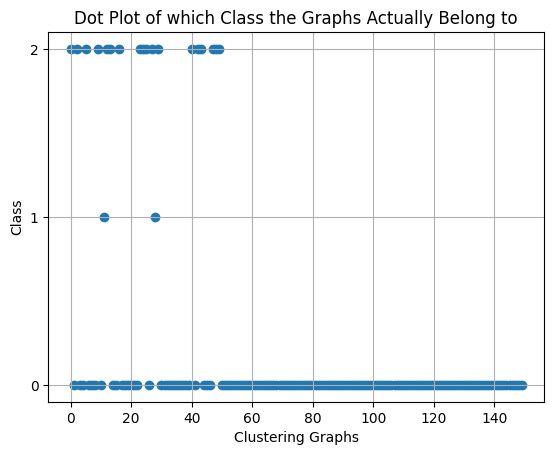

In [17]:
# list of 150 graphs
clustering_graphs = list(range(len(clustering.labels_)))

# Create a dot plot
%matplotlib inline
plt.scatter(clustering_graphs, clustering.labels_)
plt.xlabel('Clustering Graphs')
plt.ylabel('Class')
plt.title('Dot Plot of which Class the Graphs Actually Belong to')
plt.yticks([0, 1, 2])
plt.grid(True)
plt.show()

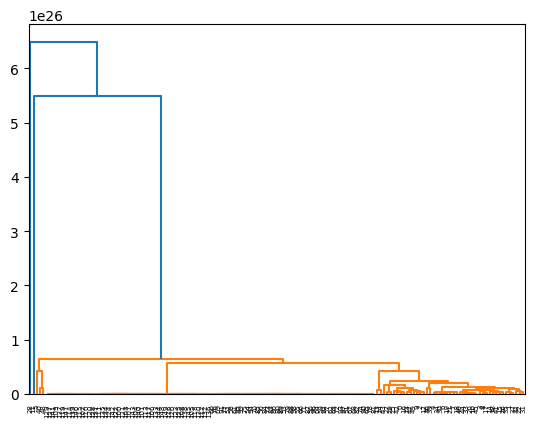

In [18]:
# visuliasation
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_data = linkage(h_dropped)

%matplotlib inline
dendrogram(linkage_data)
plt.show()

In [19]:
# select top features instead of feature matrix
feature1 = h.features[('CM', 'communities_weighted_coverage_N')]
feature2 = h.features[('CM', 'communities_weighted_coverage_E')]
feature3 = h.features[('CM', 'communities_weighted_performance_N')]
feature4 = h.features[('CM', 'communities_performance_N')]
feature5 = h.features[('Cns', 'connectance')]

top_features = pd.concat([feature1, feature2, feature3, feature4, feature5], axis=1)

In [20]:
# substitute None terms in feature matrix with 0
top_dropped = top_features.fillna(0)

# do Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit(top_dropped)

print(clustering.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


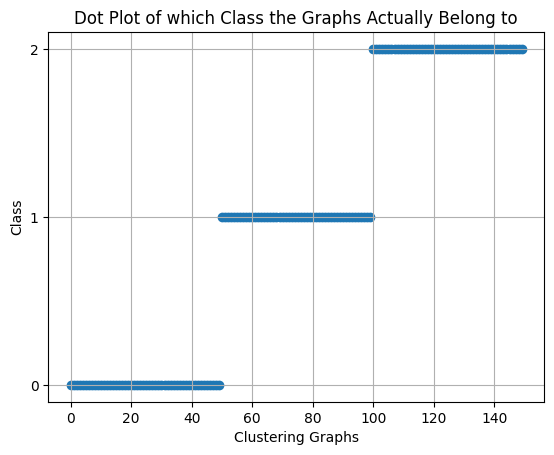

In [21]:
# list of 150 graphs
clustering_graphs = list(range(len(clustering.labels_)))

# Create a dot plot
%matplotlib inline
plt.scatter(clustering_graphs, clustering.labels_)
plt.xlabel('Clustering Graphs')
plt.ylabel('Class')
plt.title('Dot Plot of which Class the Graphs Actually Belong to')
plt.yticks([0, 1, 2])
plt.grid(True)
plt.show()

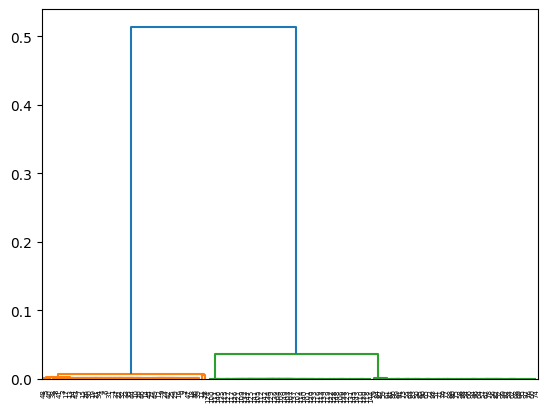

In [22]:
# visuliasation
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_top = linkage(top_dropped)

%matplotlib inline
dendrogram(linkage_top)
plt.show()

## Analyse by UMAP

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


<Axes: >

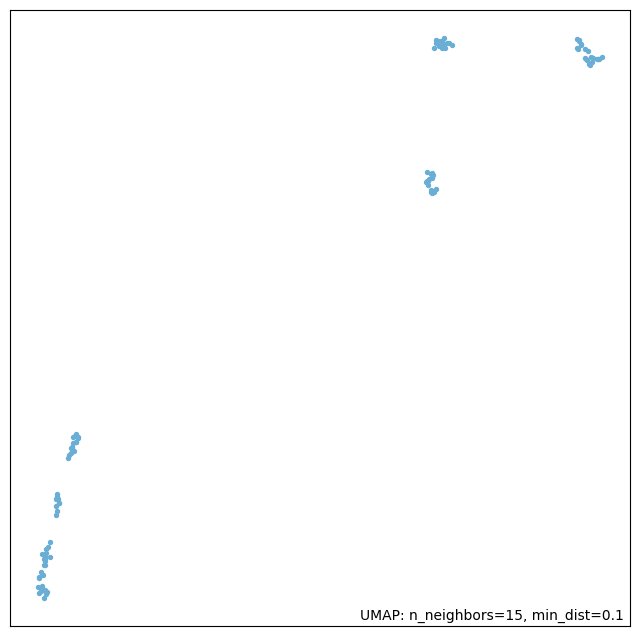

In [23]:
from umap import UMAP, plot
map = UMAP().fit(h_dropped)

%matplotlib inline
plot.points(map)